In [1]:
from pathlib import Path
import os
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_imgs_path = r"C:\Users\valer\Desktop\mmp_courses\scientific_work\тексты\VerticalAttentionOCR\Datasets\formatted\SK_lines\train"

In [3]:
train_imgs_names = os.listdir(train_imgs_path)
train_imgs_names[:5]

['train_0.jpg',
 'train_1.jpg',
 'train_10.jpg',
 'train_100.jpg',
 'train_1000.jpg']

In [4]:
train_imgs = []
for img_name in train_imgs_names:
    train_imgs.append(plt.imread(Path(train_imgs_path) / img_name))

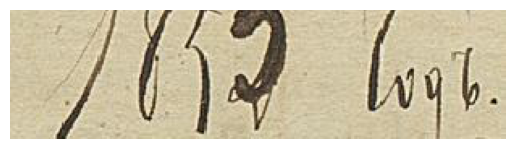

In [5]:
plt.imshow(train_imgs[0])
plt.axis("off")
plt.show()

In [6]:
batch_size = 128

In [7]:
train_imgs[0].shape

(80, 307, 3)

In [8]:
np.random.choice([0, 1, 2], 10)

array([1, 2, 1, 2, 1, 1, 0, 2, 2, 0])

In [9]:
x_max_lens = []
y_max_lens = []

for i in range(10000):
    batch_idx = np.random.choice(np.arange(len(train_imgs)), batch_size)
    batch = []
    for idx in batch_idx:
        batch.append(train_imgs[idx])
    x_lengths = [x.shape[0] for x in batch]
    y_lengths = [x.shape[1] for x in batch]
    longest_x = max(x_lengths)
    longest_y = max(y_lengths)
    x_max_lens.append(longest_x)
    y_max_lens.append(longest_y)

x_max_lens = np.array(x_max_lens)
y_max_lens = np.array(y_max_lens)

In [10]:
pd.DataFrame({"x_max_lens": x_max_lens, "y_max_lens": y_max_lens}).describe()

,x_max_lens,y_max_lens
count,10000.00000,10000.000000
mean,80.80000,1389.234100
std,1.60008,28.867023
min,80.00000,1244.000000
25%,80.00000,1386.000000
50%,80.00000,1386.000000
75%,80.00000,1411.000000
max,84.00000,1439.000000
